<a href="https://colab.research.google.com/github/Anastasios-K/Classification/blob/master/Visual%20in%20PROGRESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [0]:
loading = load_wine()
df= pd.DataFrame(loading['data'], columns = loading['feature_names']); #df['targets'] = loading['target']

In [0]:
print(df)

In [0]:
num_of_subplot = 1
#if len(df.columns) % 5 == 0:
 # length= len(df.columns)//5
#elif len(df.columns) % 5 <= 5:
 # length= len(df.columns)//5 + 1
#else:
  #length= len(df.columns)//5 + 2

figure = plt.figure(
    #num= 1,
    figsize= (12,10),
    facecolor='w'
    )
plt.subplots_adjust(
    left= 0.1,
    right= 1,
    wspace= 0.3,
    hspace= 0.2
    )
plt.rc('font', size= 8, bold=True)
for column in df:
  Shapiro_Wilk = np.round(stats.shapiro(df[column]), decimals = 3)
  _, bins = np.histogram(df[column], bins= 'auto')
  plt.subplot(3, 5, num_of_subplot)
  y_axis, x_axis, _ = plt.hist(
      df[column],
      bins= bins,
      color= 'tan',
      density= True,
      alpha= 0.75,
      histtype= 'bar'
      )
  plt.title(column)
  num_of_subplot += 1
#plt.show()

In [89]:
for i, column in enumerate(df):
  print(df.columns[i])

alcohol
malic_acid
ash
alcalinity_of_ash
magnesium
total_phenols
flavanoids
nonflavanoid_phenols
proanthocyanins
color_intensity
hue
od280/od315_of_diluted_wines
proline


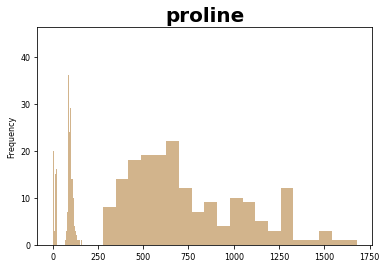

In [92]:
for i, column in enumerate(df):
  ax = df[column].plot.hist(bins=20, color='tan')
  ax.set_title(df.columns[i], weight = 'bold', size = 20)

In [0]:
def distribution_visualisation(df):
    len_indicator= len(df.columns) % 5
    num_of_subplot = 1
    normality_report = pd.DataFrame(columns = df.columns, index = ('Kolmogorov', 'Shapiro', 'Mean', 'Median'))
    
    if len_indicator == 0:
        length= len(df.columns)//5
    elif len_indicator <= 5:
        length= len(df.columns)//5 + 1
    else:
        length= len(df.columns)//5 + 2
    
    figure = plt.figure(
            num= 1,
            figsize= (5*2.5, length*3),
            facecolor='w',
            )
    plt.subplots_adjust(
            left= 0.1,
            right= 1,
            wspace= 0.13,
            hspace= 0.22
            )
    plt.rc('font', size= 8)
    
    for column in df:
        Kolmogorov = np.around((np.array(stats.kstest(df[column], 'norm'))),4)
        Shapiro_Wilk = np.around((np.array(stats.shapiro(df[column]))), 4)
        Mean = np.around((np.mean(df[column])),2)
        Median = np.around((np.median(df[column])),2)
        
        normality_report.loc['Kolmogorov', column] = Kolmogorov[1]; 
        normality_report.loc['Shapiro', column] = Shapiro_Wilk[1]
        normality_report.loc['Mean', column] = Mean; normality_report.loc['Median', column] = Median
        _, bins = np.histogram(df[column], bins= 'auto')
        
        plt.subplot(length, 5, num_of_subplot)
        y_axis, x_axis, _ = plt.hist(
                df[column],
                bins= bins,
                color= 'tan',
                density= True,
                alpha= 0.75,
                histtype= 'bar'
                )
        
        plt.title(column) 
        
        plt.tick_params(
                bottom= False,
                left= False
                )
        
        downward = 1
        for x in normality_report.index:       
            plt.text(
                    x_axis.max(),
                    y_axis.max()* downward,
                    str(x) + ": " + str(normality_report.loc[x, column]),
                    fontsize = 8,
                    fontweight = 'bold',
                    color = 'r',
                    ha = 'right',
                    va = 'top'
                    )
            downward = downward - 0.07
        
        lineSP = np.linspace((np.min(bins)), (np.max(bins)), len(bins))
        df[column].plot.kde(color= 'darkblue', ind=lineSP, alpha = 0.75)
        plt.gca().axes.get_yaxis().set_visible(False)
        num_of_subplot = num_of_subplot + 1
    plt.show()
    return figure, normality_report

if __name__ == "__main__":
    pass